# Fraud Indicator

## load data

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Zenuu19/hackathon/main/fraud_indicators.csv')
df

,TransactionID,FraudIndicator
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,0
997,998,0
998,999,0


# Data Preparation

## data separation as x and y


In [2]:
y = df['FraudIndicator']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: FraudIndicator, Length: 1000, dtype: int64

In [3]:
X = df.drop('FraudIndicator', axis =  1)
X

,TransactionID
0,1
1,2
2,3
3,4
4,5
...,...
995,996
996,997
997,998
998,999


## data splitting

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [5]:
X_train

,TransactionID
675,676
358,359
159,160
533,534
678,679
...,...
855,856
871,872
835,836
792,793


In [6]:
X_test

,TransactionID
249,250
353,354
537,538
424,425
564,565
...,...
684,685
644,645
110,111
28,29


# Model Building

## linear regression

### training the model

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### prediction

In [8]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [9]:
y_lr_train_pred

array([0.03958889, 0.04737102, 0.05225633, 0.04307489, 0.03951525,
       0.03973619, 0.05554594, 0.04624175, 0.03892606, 0.04145464,
       0.0516426 , 0.05363109, 0.05370474, 0.05208448, 0.05063608,
       0.04545618, 0.05591417, 0.04498974, 0.05279641, 0.0341635 ,
       0.04523523, 0.05151985, 0.04228932, 0.03895061, 0.05188809,
       0.04241206, 0.05058698, 0.05240363, 0.03502273, 0.0411846 ,
       0.04908947, 0.03197861, 0.05083247, 0.05478491, 0.04518613,
       0.0515444 , 0.04194563, 0.0358083 , 0.03728126, 0.03455629,
       0.04420416, 0.04692913, 0.04413051, 0.0498014 , 0.04565257,
       0.03990804, 0.04501429, 0.0445233 , 0.03364797, 0.03531732,
       0.03686392, 0.05242817, 0.03345157, 0.04386047, 0.03357432,
       0.0358574 , 0.03534187, 0.03968709, 0.0392943 , 0.05350834,
       0.05537409, 0.05137256, 0.0462172 , 0.04948226, 0.05483401,
       0.03767405, 0.03617654, 0.03381981, 0.04317309, 0.05559503,
       0.03374616, 0.05348379, 0.04931041, 0.0498996 , 0.04226

In [10]:
y_lr_test_pred

array([0.05004689, 0.04749377, 0.0429767 , 0.04575077, 0.04231387,
       0.05311556, 0.04408142, 0.04258391, 0.03205226, 0.03320608,
       0.04061997, 0.03723216, 0.05257547, 0.03966254, 0.03831233,
       0.0464627 , 0.0480584 , 0.03350067, 0.04842664, 0.04071816,
       0.03269054, 0.05085702, 0.03332883, 0.0550795 , 0.05331195,
       0.04047267, 0.03458084, 0.0549813 , 0.04236296, 0.03698667,
       0.03286239, 0.05178989, 0.05132346, 0.04962956, 0.04850029,
       0.03806684, 0.03772315, 0.03855782, 0.05213358, 0.04469515,
       0.05196174, 0.05235453, 0.05073427, 0.04415506, 0.03926975,
       0.05053788, 0.04192108, 0.05326285, 0.0343599 , 0.04437601,
       0.05191264, 0.03583285, 0.04688003, 0.04854939, 0.05070972,
       0.05510405, 0.03887697, 0.04285395, 0.03787044, 0.05016964,
       0.05466216, 0.0428294 , 0.04359043, 0.05557048, 0.0427312 ,
       0.04629085, 0.05417117, 0.05230543, 0.04430236, 0.04516158,
       0.04246116, 0.04351678, 0.03323063, 0.05078337, 0.04017

### evaluate model performance

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [12]:
print('LR MSE (Train): ', lr_train_mse)
print('LR R2 (Train): ', lr_train_r2)
print('LR MSE (Test): ', lr_test_mse)
print('LR R2 (Test): ', lr_test_r2)

LR MSE (Train):  0.04178531992772365
LR R2 (Train):  0.0012099064895191303
LR MSE (Test):  0.047463715332523984
LR R2 (Test):  0.0007638877363367325


In [13]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [14]:
lr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.041785,0.00121,0.047464,0.000764


## random forest

### training the model

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### prediction

In [16]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [17]:
y_rf_train_pred

array([0.03770725, 0.0379311 , 0.10017397, 0.03137421, 0.03770725,
       0.03810314, 0.05040727, 0.03557551, 0.02995785, 0.03133278,
       0.04667432, 0.05319556, 0.05319556, 0.04667432, 0.04734917,
       0.04426334, 0.06764392, 0.03165341, 0.05238683, 0.02163335,
       0.03165341, 0.04667432, 0.03133278, 0.02995785, 0.04667432,
       0.03133278, 0.05589273, 0.06294361, 0.02163335, 0.03178294,
       0.05383608, 0.05046531, 0.04734917, 0.05040727, 0.03165341,
       0.04667432, 0.03133278, 0.02163335, 0.02378535, 0.02163335,
       0.03165341, 0.03557551, 0.03165341, 0.04586561, 0.0350062 ,
       0.03810314, 0.03165341, 0.03165341, 0.03475653, 0.02163335,
       0.02378535, 0.06294361, 0.07046887, 0.03165341, 0.03475653,
       0.02163335, 0.02163335, 0.05812524, 0.03770725, 0.05319556,
       0.05040727, 0.04667432, 0.03557551, 0.04543675, 0.05040727,
       0.02378535, 0.02163335, 0.03475653, 0.03137421, 0.05040727,
       0.03475653, 0.05319556, 0.04448263, 0.04586561, 0.03133

In [18]:
y_rf_test_pred

array([0.04586561, 0.0379311 , 0.03137421, 0.0350062 , 0.03133278,
       0.05238683, 0.03165341, 0.03193815, 0.05046531, 0.05154682,
       0.03178294, 0.02378535, 0.05238683, 0.05812524, 0.05851973,
       0.03557551, 0.1478144 , 0.03475653, 0.04309322, 0.03178294,
       0.05046531, 0.04734917, 0.06799185, 0.05040727, 0.05319556,
       0.03178294, 0.02163335, 0.05040727, 0.03133278, 0.02378535,
       0.05046531, 0.04667432, 0.04667432, 0.05539929, 0.04309322,
       0.02378535, 0.02378535, 0.02995785, 0.04667432, 0.03165341,
       0.04667432, 0.06294361, 0.04734917, 0.03165341, 0.03770725,
       0.04586561, 0.03133278, 0.05319556, 0.02163335, 0.03165341,
       0.04667432, 0.02163335, 0.03557551, 0.04309322, 0.04734917,
       0.05040727, 0.02995785, 0.03137421, 0.02378535, 0.04586561,
       0.05040727, 0.03137421, 0.03165341, 0.05040727, 0.03137421,
       0.03557551, 0.05319556, 0.08181279, 0.03165341, 0.03165341,
       0.03133278, 0.03165341, 0.05154682, 0.04734917, 0.03178

### evaluate model performance

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [20]:
print('RF MSE (Train): ', rf_train_mse)
print('RF R2 (Train): ', rf_train_r2)
print('RF MSE (Test): ', rf_test_mse)
print('RF R2 (Test): ', rf_test_r2)

RF MSE (Train):  0.03880493373959815
RF R2 (Train):  0.07244976308710327
RF MSE (Test):  0.04823659146036787
RF R2 (Test):  -0.015507188639324099


In [21]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [22]:
rf_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Random Forest,0.038805,0.07245,0.048237,-0.015507


## gradient boosting regression

### training the model

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(max_depth=2, random_state=100)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, random_state=100)

### prediction

In [24]:
y_gbr_train_pred = gbr.predict(X_train)
y_gbr_test_pred = gbr.predict(X_test)

In [25]:
y_gbr_train_pred

array([0.06420476, 0.03489975, 0.26426646, 0.03994605, 0.06420476,
       0.04618554, 0.02055658, 0.03489975, 0.02399161, 0.03401213,
       0.03004109, 0.04509593, 0.04509593, 0.03004109, 0.05425209,
       0.03489975, 0.04474435, 0.03201337, 0.04486552, 0.01366411,
       0.03201337, 0.03004109, 0.03401213, 0.02399161, 0.03004109,
       0.03401213, 0.04372094, 0.05541654, 0.01366411, 0.03401213,
       0.37867722, 0.01201321, 0.05425209, 0.02055658, 0.03201337,
       0.03004109, 0.03401213, 0.01366411, 0.01723755, 0.01366411,
       0.03201337, 0.03489975, 0.03201337, 0.04372094, 0.03489975,
       0.04618554, 0.03201337, 0.03201337, 0.05772225, 0.01366411,
       0.01723755, 0.05541654, 0.05772225, 0.03201337, 0.05772225,
       0.01366411, 0.01366411, 0.06420476, 0.06420476, 0.04509593,
       0.02055658, 0.03004109, 0.03489975, 0.0398629 , 0.02055658,
       0.01723755, 0.01366411, 0.05772225, 0.03994605, 0.02055658,
       0.05772225, 0.04509593, 0.0398629 , 0.04372094, 0.03401

In [26]:
y_gbr_test_pred

array([0.04372094, 0.03489975, 0.03994605, 0.03489975, 0.03401213,
       0.04486552, 0.03201337, 0.04260355, 0.01201321, 0.04615969,
       0.03058979, 0.01723755, 0.04486552, 0.06420476, 0.48241178,
       0.03489975, 0.63290684, 0.05772225, 0.03477722, 0.03058979,
       0.77076334, 0.05425209, 0.04615969, 0.02055658, 0.04509593,
       0.03058979, 0.01366411, 0.02055658, 0.03401213, 0.01723755,
       0.04047139, 0.03004109, 0.03004109, 0.04372094, 0.03477722,
       0.01723755, 0.01723755, 0.02399161, 0.03004109, 0.03201337,
       0.03004109, 0.05541654, 0.05425209, 0.03201337, 0.06420476,
       0.04372094, 0.03401213, 0.04509593, 0.01366411, 0.03201337,
       0.03004109, 0.01366411, 0.03489975, 0.03477722, 0.05425209,
       0.02055658, 0.02399161, 0.03994605, 0.01723755, 0.04372094,
       0.02055658, 0.03994605, 0.03201337, 0.02055658, 0.03994605,
       0.03489975, 0.04087618, 0.05541654, 0.03201337, 0.03201337,
       0.03401213, 0.03201337, 0.04615969, 0.05425209, 0.03058

### evaluate model performance

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

gbr_train_mse = mean_squared_error(y_train, y_gbr_train_pred)
gbr_train_r2 = r2_score(y_train, y_gbr_train_pred)

gbr_test_mse = mean_squared_error(y_test, y_gbr_test_pred)
gbr_test_r2 = r2_score(y_test, y_gbr_test_pred)

In [28]:
print('GBR MSE (Train): ', gbr_train_mse)
print('GBR R2 (Train): ', gbr_train_r2)
print('GBR MSE (Test): ', gbr_test_mse)
print('GBR R2 (Test): ', gbr_test_r2)

GBR MSE (Train):  0.025092204118743924
GBR R2 (Train):  0.40022369239977196
GBR MSE (Test):  0.05692899672423533
GBR R2 (Test):  -0.19850519419442825


In [29]:
gbr_results = pd.DataFrame(['Gradient Boosting Regression', gbr_train_mse, gbr_train_r2, gbr_test_mse, gbr_test_r2]).transpose()
gbr_results.columns = ('Method', 'Train MSE', 'Train R2', 'Test MSE', 'Test R2')

In [30]:
gbr_results

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Gradient Boosting Regression,0.025092,0.400224,0.056929,-0.198505


# Model Comparison

In [31]:
df_models = pd.concat([lr_results, rf_results, gbr_results], axis=0)
df_models

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.041785,0.00121,0.047464,0.000764
0,Random Forest,0.038805,0.07245,0.048237,-0.015507
0,Gradient Boosting Regression,0.025092,0.400224,0.056929,-0.198505


In [32]:
df_models.reset_index(drop=True)

,Method,Train MSE,Train R2,Test MSE,Test R2
0,Linear Regression,0.041785,0.00121,0.047464,0.000764
1,Random Forest,0.038805,0.07245,0.048237,-0.015507
2,Gradient Boosting Regression,0.025092,0.400224,0.056929,-0.198505


# Data visualization

Text(0.5, 0, 'Experimental FraudIndicator')

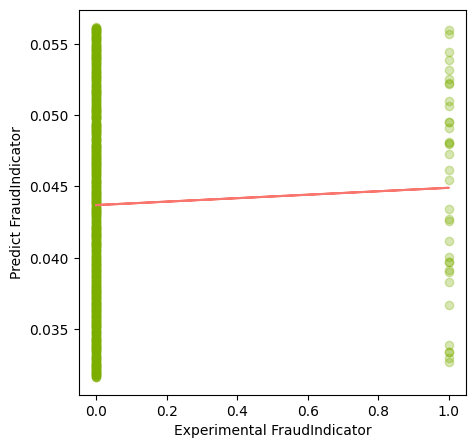

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred,1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), '#F8766D')
plt.ylabel('Predict FraudIndicator')
plt.xlabel('Experimental FraudIndicator')